In [1]:
from flashcaster import *

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic time series data
np.random.seed(42)
dates = pd.date_range("2020-01-01", periods=500)
price_data = np.sin(np.linspace(0, 50, 500)) + np.random.normal(0, 0.1, 500)  # A sine wave with noise
df = pd.DataFrame(data={"Date": dates, "Price": price_data}).set_index("Date")
df

,Price
Date,
2020-01-01,0.049671
2020-01-02,0.086206
2020-01-03,0.263831
2020-01-04,0.448397
2020-01-05,0.366741
...,...
2021-05-10,-0.564178
2021-05-11,-0.640055
2021-05-12,-0.468246


In [3]:
# Initialize the LSTM model
n_features = 1  # Number of features (in this case, just 'Price')
model = Magic(n_features=n_features, num_layers=3, hidden_size=250)

In [6]:
# These settings are not high enough to be accurate, just reasonable
future = predict_futures(
    df, 
    model,
    epochs=100, 
    n_forecasts=10,
    sliding_window_divisor=4, 
    ignore_hols=[["UK", "US"]], 
    lookback=20, 
    verbose = True)[0]

Running model 0...
Loss at epoch 20: 0.003307879902422428
Loss at epoch 40: 0.0026544355787336826
Loss at epoch 60: 0.0019425138598307967
Loss at epoch 80: 0.0016228851163759828
Loss at epoch 100: 0.0025186019483953714
Forecast [1/10]: tensor([[[0.3426]]])
Forecast [2/10]: tensor([[[0.3600]]])
Forecast [3/10]: tensor([[[0.3769]]])
Forecast [4/10]: tensor([[[0.3944]]])
Forecast [5/10]: tensor([[[0.4121]]])
Forecast [6/10]: tensor([[[0.4301]]])
Forecast [7/10]: tensor([[[0.4483]]])
Forecast [8/10]: tensor([[[0.4667]]])
Forecast [9/10]: tensor([[[0.4858]]])
Forecast [10/10]: tensor([[[0.5053]]])


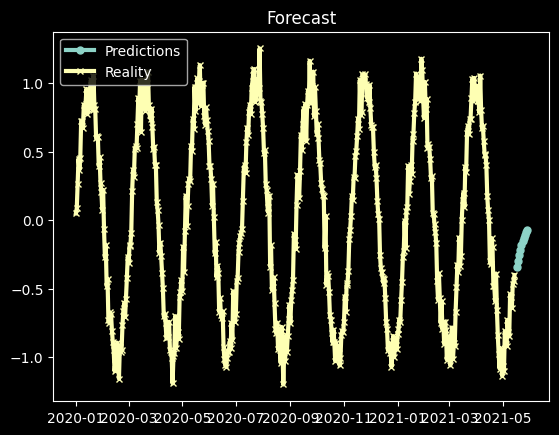

In [5]:
quick_visuals((future, df))